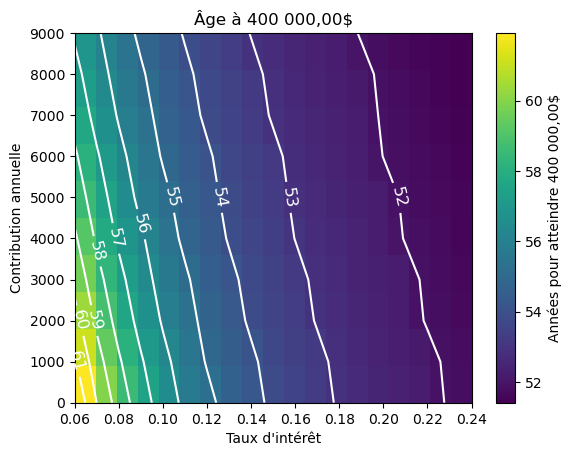

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import bydoux_tools as bt


init = 177800
rates = np.arange(0.06, 0.25, 0.01)
contrib = np.arange(0,10000,1000)

goal = 4e5

mesh_rates, contribs = np.meshgrid(rates, contrib)

yr_1m = np.zeros((len(contrib), len(rates)))

yr = 49
yrs = np.arange(yr,yr+100)


for irates in range(len(rates)):
    for icontrib in range(len(contrib)):
        v = init*1.0
        vals = np.zeros(len(yrs))
        for iyr in range(len(yrs)):
            v *= (1 + mesh_rates[icontrib,irates])
            v += contribs[ icontrib,irates]
            vals[iyr] = v
        i1 = np.sum(vals<goal)
        
        fit = np.polyfit( vals[i1:i1+2], yrs[i1:i1+2],1)
        yr_1m[icontrib,irates ] = np.polyval(fit, goal)


plt.imshow(yr_1m, aspect='auto', extent=[np.min(mesh_rates), np.max(mesh_rates), np.min(contribs), np.max(contribs)], origin='lower', cmap='viridis')
plt.colorbar(label=f"Années pour atteindre "+bt.pdollar(goal))

# Ajout des contours
contours = plt.contour(mesh_rates, contribs, yr_1m, levels=np.arange(np.floor(np.min(yr_1m)), np.ceil(np.max(yr_1m))+1), colors='white', linewidths=1.5)
plt.clabel(contours, inline=True, fmt='%d', fontsize=12)  # Affiche les valeurs entières sur les contours

plt.ylabel("Contribution annuelle")
plt.xlabel("Taux d'intérêt")
plt.title("Âge à "+bt.pdollar(goal))
plt.show()